<a href="https://colab.research.google.com/github/ArpitaDeshmukh2024/SPPU_DL_practicals/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
boston_dataset = tf.keras.datasets.boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(xtrain,ytrain),(xtest,ytest) = boston_dataset

In [4]:
scaler = StandardScaler()
xtrain, xtest = scaler.fit_transform(xtrain), scaler.transform(xtest)

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape = (xtrain.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
history = model.fit(xtrain, ytrain, epochs=100, validation_split=0.2, verbose=0)

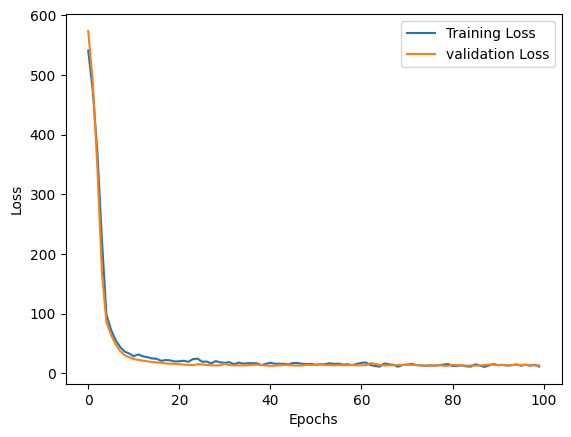

In [8]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
loss, mae = model.evaluate(xtest, ytest)
print("MSE Loss : ", loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.6500 - mae: 2.9579 
MSE Loss :  23.833974838256836


In [17]:
# mae = model.evaluate(xtest, ytest)

In [18]:
ypred = model.predict(xtest).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [19]:
print("Test MAE : ", mae)
print("Actual Price : ", ytest)
print("Predicted Price : ", ypred)

Test MAE :  [23.833974838256836, 3.205336332321167]
Actual Price :  [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
Predicted Price :  [ 8.52069   17.529436  20.530058  30.464378  24.258245  18.217133
 26.781265  21.157187  18.78465   21.25592   17.079523  16.368801
 14.717953  40.335953  19.508928  19.237246  25.211344  21.131958
 18.678787  35.692734  11.466732  14.473828  19.831598  14.554534
 20.203047  24.005232  29.754412  27.759481  10.189685  20.509565
 18.378857  14.272559  34.080128  23.611036  17.173805   7.9181
 